In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("adult.csv")


In [5]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.shape


(48842, 15)

In [6]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [7]:
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)
df['native-country'] = df['native-country'].replace('?',np.nan)

In [8]:
df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [11]:
df.dropna(how = 'any',inplace = True)

In [12]:
df = df.drop_duplicates()

In [13]:
df.shape

(45175, 15)

In [14]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [24]:
columns_to_drop = ['fnlwgt', 'educational-num', 'marital-status', 'relationship', 'race']
df = df.drop(columns=columns_to_drop, errors='ignore')


In [25]:
df.columns

Index(['age', 'workclass', 'education', 'occupation', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [27]:
X = df.loc[:,['age', 'workclass', 'education', 'occupation', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country']]

In [28]:
y = df.loc[:,['income']]

In [29]:
X

,age,workclass,education,occupation,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Machine-op-inspct,Male,0,0,40,United-States
1,38,Private,HS-grad,Farming-fishing,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,Protective-serv,Male,0,0,40,United-States
3,44,Private,Some-college,Machine-op-inspct,Male,7688,0,40,United-States
5,34,Private,10th,Other-service,Male,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,Tech-support,Female,0,0,38,United-States
48838,40,Private,HS-grad,Machine-op-inspct,Male,0,0,40,United-States
48839,58,Private,HS-grad,Adm-clerical,Female,0,0,40,United-States
48840,22,Private,HS-grad,Adm-clerical,Male,0,0,20,United-States


In [30]:
y

,income
0,<=50K
1,<=50K
2,>50K
3,>50K
5,<=50K
...,...
48837,<=50K
48838,>50K
48839,<=50K
48840,<=50K


In [34]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
y = pd.DataFrame(y)
y.head()


,0
0,0
1,0
2,1
3,1
4,0


In [36]:
numeric_features = X.select_dtypes('number')
categorical_features = X.select_dtypes('object')


In [37]:
categorical_features

,workclass,education,occupation,gender,native-country
0,Private,11th,Machine-op-inspct,Male,United-States
1,Private,HS-grad,Farming-fishing,Male,United-States
2,Local-gov,Assoc-acdm,Protective-serv,Male,United-States
3,Private,Some-college,Machine-op-inspct,Male,United-States
5,Private,10th,Other-service,Male,United-States
...,...,...,...,...,...
48837,Private,Assoc-acdm,Tech-support,Female,United-States
48838,Private,HS-grad,Machine-op-inspct,Male,United-States
48839,Private,HS-grad,Adm-clerical,Female,United-States
48840,Private,HS-grad,Adm-clerical,Male,United-States


In [38]:
numeric_features


,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
5,34,0,0,30
...,...,...,...,...
48837,27,0,0,38
48838,40,0,0,40
48839,58,0,0,40
48840,22,0,0,20


In [40]:
Converted = pd.get_dummies(categorical_features)
Converted.shape

(45175, 80)

In [41]:
allfeatures = [Converted,numeric_features]
newX = pd.concat(allfeatures,axis = 1,join='inner')


In [42]:
newX.shape

(45175, 84)

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(newX,y,test_size = 0.33,random_state = 42)


In [47]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [52]:
y_pred = clf.predict(X_test)


In [53]:
y_test.shape


(14908, 1)

In [54]:
y_pred.shape


(14908,)

In [55]:
predictions_df = pd.DataFrame()
predictions_df['predicted_salary_class'] = y_pred
predictions_df['actual_salary_class'] = y_test[0].values
predictions_df

,predicted_salary_class,actual_salary_class
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
14903,0,0
14904,0,1
14905,0,0
14906,0,0


In [58]:
from sklearn.metrics import accuracy_score

In [59]:
print(accuracy_score(y_pred,y_test))

0.8196941239602897


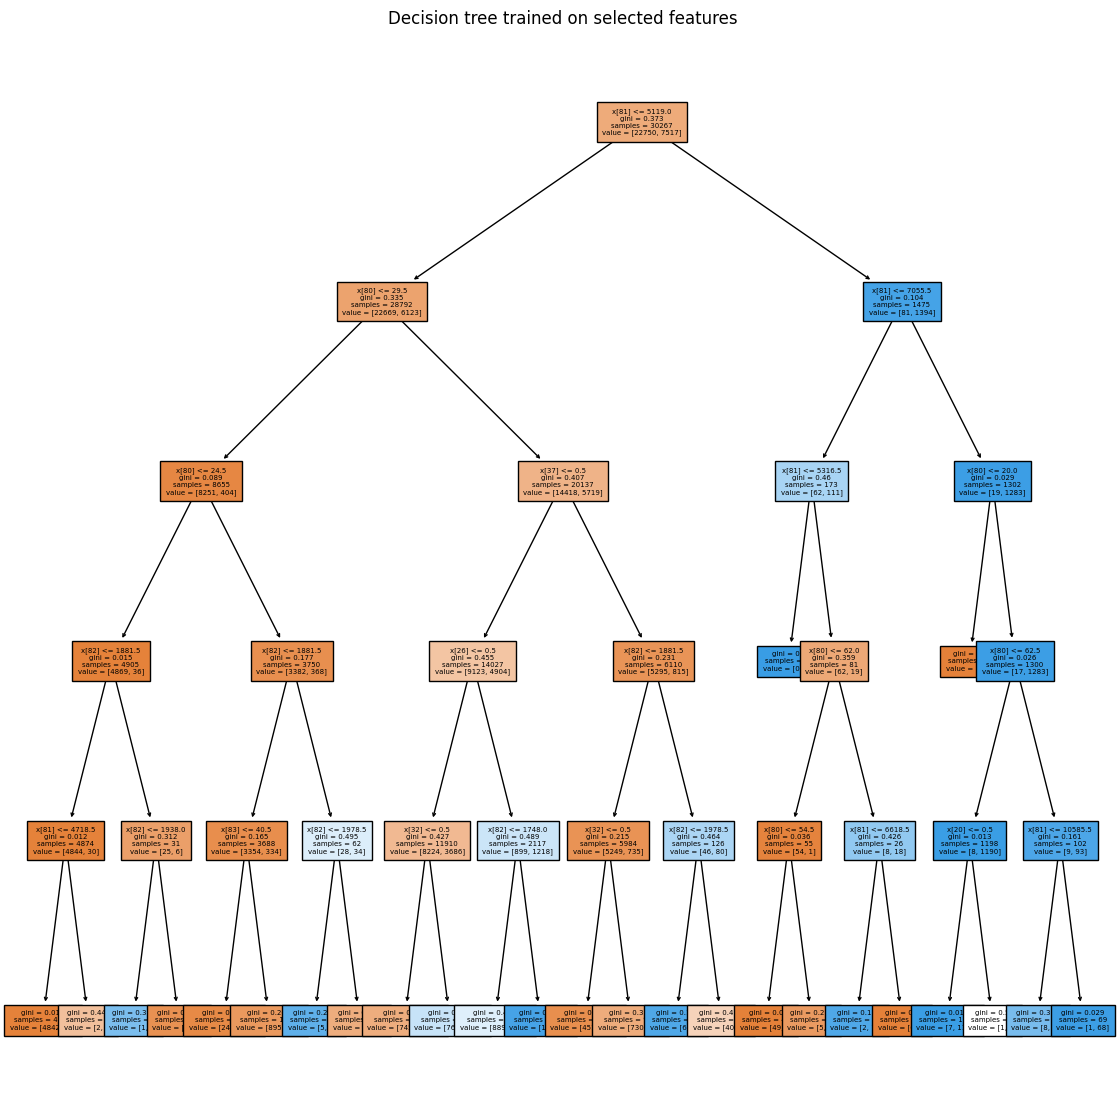

In [62]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,14))
plot_tree(clf,fontsize=5,filled = True)
plt.title("Decision tree trained on selected features")
plt.show()